# Estudo do curso: [Geopandas: trabalhando com dados geoespaciais](https://cursos.alura.com.br/course/geopandas-trabalhando-dados-geoespaciais)

* Introdução ao GeoPandas
* Trabalhando com sistemas de coordenadas
* Filtrando imóveis por região
* Calculando distâncias

## Links:

* [Link do dataset](https://cdn3.gnarususercontent.com.br/3060-dados-geograficos-geopandas/Cobertura_Vegetal_e_Uso_da_Terra_2018.geojson)
* [Link original do dataset](https://www.data.rio/datasets/cobertura-vegetal-e-uso-da-terra-2018/explore)
* [IBGE](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html)
* [Github do curso](https://github.com/alura-cursos/curso_geopandas/tree/main/dados)
* [Github do projeto completo do curso](https://github.com/alura-cursos/curso_geopandas/blob/main/Projeto_completo.ipynb)

In [ ]:
!pip install geopandas seaborn

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

url = "https://github.com/alura-cursos/curso_geopandas/raw/main/dados/RJ_Municipios_2022.shp"
df_rj = gpd.read_file(url)

In [2]:
df_rj.head()

CD_MUN              NM_MUN SIGLA_UF  AREA_KM2  \
0  3300100      Angra dos Reis       RJ   813.420   
1  3300159             Aperibé       RJ    94.542   
2  3300209            Araruama       RJ   638.276   
3  3300225               Areal       RJ   110.724   
4  3300233  Armação dos Búzios       RJ    70.977   

                                            geometry  
0  MULTIPOLYGON (((-44.51649 -23.03589, -44.51633...  
1  POLYGON ((-42.11437 -21.61204, -42.11394 -21.6...  
2  POLYGON ((-42.28399 -22.93928, -42.28444 -22.9...  
3  POLYGON ((-43.09004 -22.23844, -43.09135 -22.2...  
4  MULTIPOLYGON (((-41.91872 -22.77162, -41.91854...

In [3]:
type(df_rj)

geopandas.geodataframe.GeoDataFrame

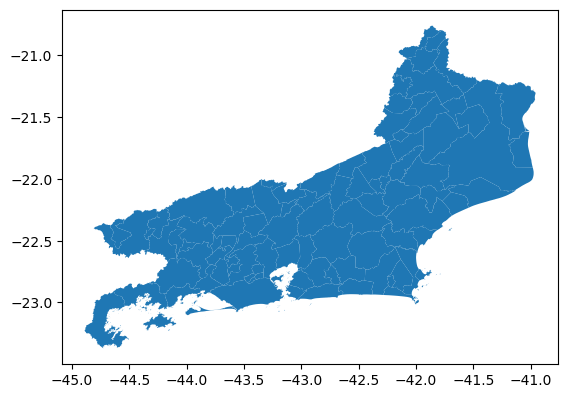

In [4]:
df_rj.plot()
plt.show()

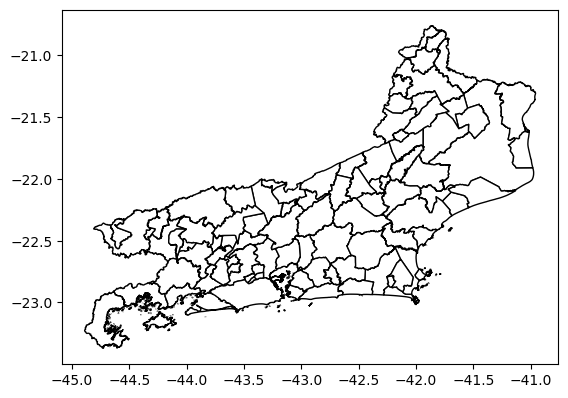

In [5]:
df_rj.plot(color='white', edgecolor='black')
plt.show()

In [6]:
df_rj = df_rj[df_rj["NM_MUN"] == "Rio de Janeiro"]
df_rj.head()

CD_MUN          NM_MUN SIGLA_UF  AREA_KM2  \
67  3304557  Rio de Janeiro       RJ  1200.329   

                                             geometry  
67  MULTIPOLYGON (((-43.66048 -22.99958, -43.66050...

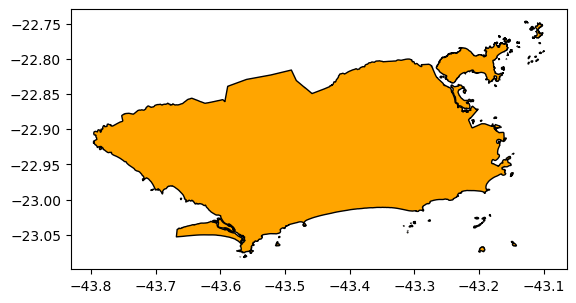

In [7]:
df_rj.plot(color="orange", edgecolor="black")
plt.show()

In [8]:
df_rj.to_file("rj_munic.shp")

<Axes: >

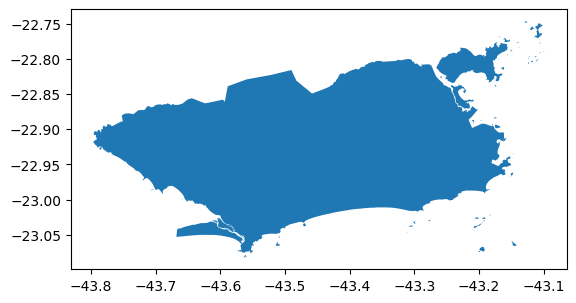

In [9]:
df_rj2 = gpd.read_file("rj_munic.shp")
df_rj2.plot()

<Axes: >

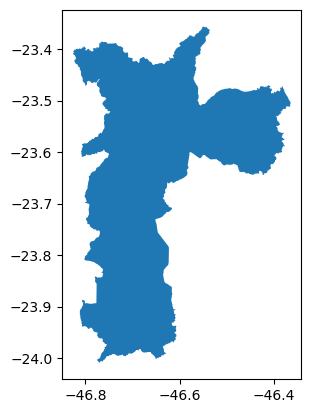

In [10]:
df_sp = gpd.read_file("https://github.com/alura-cursos/curso_geopandas/raw/main/dados/Estado_SP.shp")
df_sp = df_sp[df_sp["NM_MUN"] == "São Paulo"]
df_sp.plot()

In [11]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/curso_geopandas/main/dados/dados.csv'
df = pd.read_csv(url, sep='\t')
df.head()

Area                    Bairro          Cidade  \
0   138  Recreio dos Bandeirantes  Rio de Janeiro   
1   133   Freguesia (Jacarepaguá)  Rio de Janeiro   
2    46                   Pilares  Rio de Janeiro   
3    65           Barra da Tijuca  Rio de Janeiro   
4    85                     Gávea  Rio de Janeiro   

                        Endereco Estado   Latitude  Longitude  Quartos  \
0            Rua Vicente Scofano     RJ -23.016455 -43.462946        3   
1                  Rua Potiguara     RJ -22.943199 -43.336911        3   
2  Rua Professor Carneiro Felipe     RJ -22.873849 -43.300517        1   
3       Avenida Salvador Allende     RJ -22.984787 -43.412703        2   
4     Rua Marquês de São Vicente     RJ -14.235004 -51.925280        2   

   Suites  Vagas         Tipo Transacao    Valor  
0       1      3  Apartamento     Venda  1095000  
1       1      2  Apartamento     Venda   650000  
2       0      0  Apartamento     Venda   150000  
3       1      1  Apartamento     Venda   430000  
4       1      2  Apartamento     Venda  1800000

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
from shapely import Point

pontos_geometricos = [ Point(x) for x in zip(df['Longitude'], df['Latitude']) ]
pontos_geometricos

[<POINT (-43.463 -23.016)>,
 <POINT (-43.337 -22.943)>,
 <POINT (-43.301 -22.874)>,
 <POINT (-43.413 -22.985)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.478 -23.019)>,
 <POINT (-43.247 -22.934)>,
 <POINT (-43.193 -22.982)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.175 -22.936)>,
 <POINT (-43.263 -22.919)>,
 <POINT (-49.061 -26.923)>,
 <POINT (-43.303 -23.013)>,
 <POINT (-43.17 -22.953)>,
 <POINT (-43.185 -22.971)>,
 <POINT (-43.355 -23.01)>,
 <POINT (-49.061 -26.923)>,
 <POINT (-43.346 -22.938)>,
 <POINT (-43.182 -22.95)>,
 <POINT (-43.233 -22.922)>,
 <POINT (-43.394 -23)>,
 <POINT (-43.281 -22.906)>,
 <POINT (-43.188 -22.934)>,
 <POINT (-43.502 -23.019)>,
 <POINT (-43.459 -23.023)>,
 <POINT (-43.234 -22.994)>,
 <POINT (-43.199 -22.985)>,
 <POINT (-43.231 -22.977)>,
 <POINT (-43.253 -22.927)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.185 -22.971)>,
 <POINT (-43.418 -22.999)>,
 <POINT (-43.308 -23.014)>,
 <POINT (-43.351 -22.989)>,
 <POINT (-43.415 -22.998)>,
 <POINT (-43.199 -22.981)>,

In [14]:
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
df_dados = gpd.GeoDataFrame(df, crs=crs, geometry=pontos_geometricos)
df_dados.head()

Area                    Bairro          Cidade  \
0   138  Recreio dos Bandeirantes  Rio de Janeiro   
1   133   Freguesia (Jacarepaguá)  Rio de Janeiro   
2    46                   Pilares  Rio de Janeiro   
3    65           Barra da Tijuca  Rio de Janeiro   
4    85                     Gávea  Rio de Janeiro   

                        Endereco Estado   Latitude  Longitude  Quartos  \
0            Rua Vicente Scofano     RJ -23.016455 -43.462946        3   
1                  Rua Potiguara     RJ -22.943199 -43.336911        3   
2  Rua Professor Carneiro Felipe     RJ -22.873849 -43.300517        1   
3       Avenida Salvador Allende     RJ -22.984787 -43.412703        2   
4     Rua Marquês de São Vicente     RJ -14.235004 -51.925280        2   

   Suites  Vagas         Tipo Transacao    Valor                     geometry  
0       1      3  Apartamento     Venda  1095000  POINT (-43.46295 -23.01646)  
1       1      2  Apartamento     Venda   650000  POINT (-43.33691 -22.94320)  
2       0      0  Apartamento     Venda   150000  POINT (-43.30052 -22.87385)  
3       1      1  Apartamento     Venda   430000  POINT (-43.41270 -22.98479)  
4       1      2  Apartamento     Venda  1800000  POINT (-51.92528 -14.23500)

In [15]:
df_dados.to_file('dataset.shp')

<Axes: >

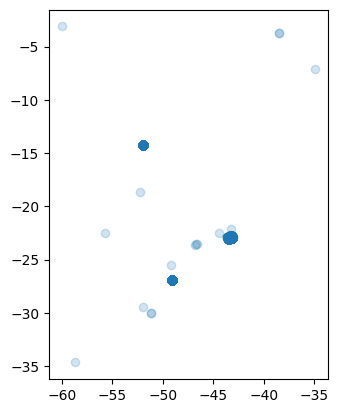

In [16]:
df_dados.plot(alpha=0.2)

In [17]:
df_rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [18]:
# Coordinate Reference System
df_dados.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Qual a zona UTM em que o município do Rio de Janeiro está inserido?

O municipio do Rio de Janeiro, no Brasil, está inserido na Zona UTM 235 (Universal Transverse Mercator). A UTM é um sistema de coordenadas utilizado para representar a localização de pontos na superficie da Terra e é dividido em várias zonas para melhor precisão. A zona 235 cobre uma grande parte do território brasileiro, incluindo a cidade do Rio de Janeiro.

Qual o EPSG para zona UTM 23S utilizando o SIRGAS 2000?

O EPSG (European Petroleum Survey Group) é um sistema de códigos numéricos usado para identificar sistemas de referência espacial, como projeções cartográficas e sistemas de coordenadas. Para a Zona UTM 235 utilizando o SIRGAS 2000, o EPSG correspondente é 31983. Este código é amplamente utilizado para representar as coordenadas geográficas da região da Zona UTM 23S no Brasil, incluindo o município do Rio de Janeiro.

In [19]:
# Encontrado no link: https://spatialreference.org/ref/epsg/31983/ e usando o formato Proj4 
df_rj = df_rj.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +units=km +no_defs +type=crs")

In [20]:
df_dados = df_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<Axes: >

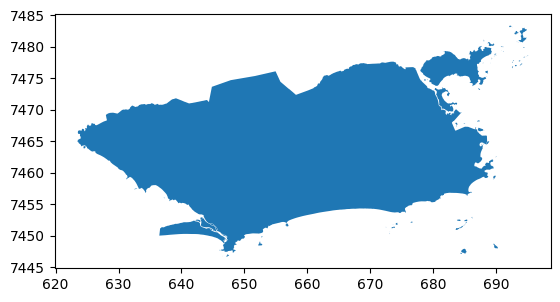

In [21]:
df_rj.plot()

<Axes: >

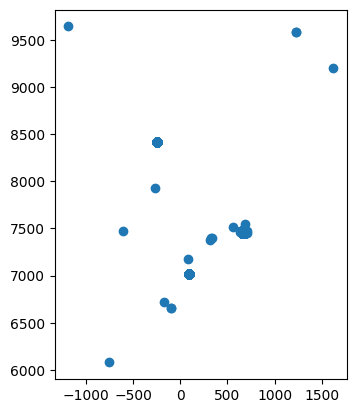

In [22]:
base = df_rj.plot(color='black')
df_dados.plot(ax=base)

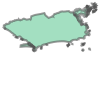

In [23]:
df_rj.iloc[0].geometry

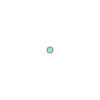

In [24]:
df_dados.iloc[0].geometry

In [25]:
df_dados.iloc[0].geometry.within(df_rj.iloc[0].geometry)

True

In [26]:
df_dados.shape

(5000, 14)

<Axes: >

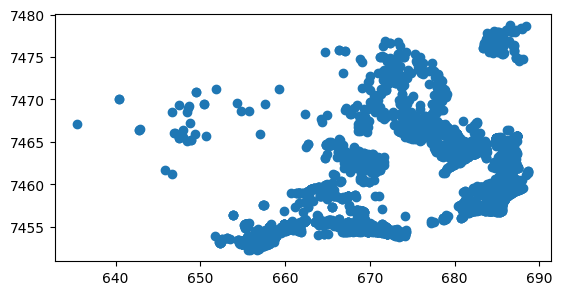

In [27]:
df_dados = df_dados[df_dados['geometry'].within(df_rj.iloc[0].geometry)]
df_dados.plot()

In [28]:
df_dados.shape

(4513, 14)

<Axes: >

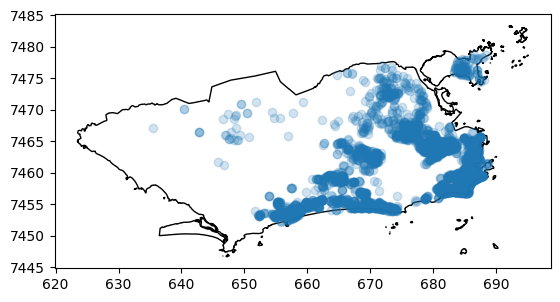

In [29]:
base = df_rj.plot(color='white', edgecolor='black')
df_dados.plot(ax=base, alpha=0.2)

In [32]:
# Link para os dados de metro do rio: https://www.data.rio/
url_metro = 'https://github.com/allanspadini/curso_geopandas/raw/main/dados/metro.geojson'
df_metro = gpd.read_file(url_metro)
df_metro.head()

objectid  cod                      nome  flg_atm  flg_bicicletario  \
0         1    1                    Pavuna        1               1.0   
1         2    2   Engenheiro Rubens Paiva        1               1.0   
2         3    3  Acari / Fazenda Botafogo        0               0.0   
3         4    4               Coelho Neto        1               0.0   
4         5    5                   Colégio        1               1.0   

   flg_elevador  flg_linha1  flg_linha2   obs  flg_ativa  ... integra_trem  \
0           1.0           0           1  None          1  ...            1   
1           1.0           0           1  None          1  ...            0   
2           0.0           0           1  None          1  ...            0   
3           0.0           0           1  None          1  ...            0   
4           0.0           0           1  None          1  ...            0   

  integra_onibus  integra_brt  corredor  integra_vlt  onibus  \
0              0            0      None            0    None   
1              0            0      None            0    None   
2              0            0      None            0    None   
3              0            0      None            0    None   
4              0            0      None            0    None   

  flg_metro_superficie  metro_superficie data_inauguracao  \
0                    0              None             1998   
1                    0              None             1998   
2                    0              None             1998   
3                    0              None             1998   
4                    0              None             1998   

                      geometry  
0  POINT (-43.36489 -22.80663)  
1  POINT (-43.35849 -22.81628)  
2  POINT (-43.34968 -22.82453)  
3  POINT (-43.34330 -22.83149)  
4  POINT (-43.33390 -22.84270)  

[5 rows x 23 columns]

In [33]:
# spatialreference.org/ref/epsg/31983/proj4/
df_metro = df_metro.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")

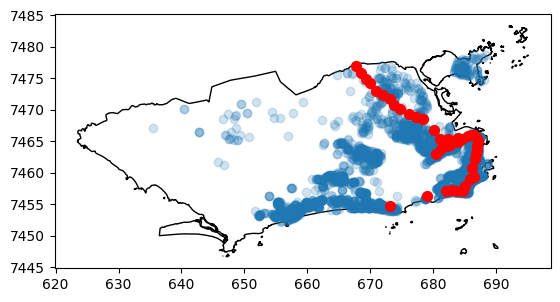

In [34]:
base = df_rj.plot(color='white', edgecolor='black')
df_dados.plot(ax=base, alpha=0.2)
df_metro.plot(ax=base, color='red', markersize=50)
plt.show()

In [36]:
distancias = df_metro.distance(df_dados.iloc[0].geometry)
distancias.min(), distancias.max()

(15.618532512237714, 31.691264782428572)

In [37]:
df_dados["dist_metro"] = df_dados["geometry"].apply(lambda x: df_metro.distance(x).min())
df_dados.head()

D:\Programas\miniconda3\envs\rflr_mario\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Area                    Bairro          Cidade  \
0   138  Recreio dos Bandeirantes  Rio de Janeiro   
1   133   Freguesia (Jacarepaguá)  Rio de Janeiro   
2    46                   Pilares  Rio de Janeiro   
3    65           Barra da Tijuca  Rio de Janeiro   
5   260  Recreio dos Bandeirantes  Rio de Janeiro   

                         Endereco Estado   Latitude  Longitude  Quartos  \
0             Rua Vicente Scofano     RJ -23.016455 -43.462946        3   
1                   Rua Potiguara     RJ -22.943199 -43.336911        3   
2   Rua Professor Carneiro Felipe     RJ -22.873849 -43.300517        1   
3        Avenida Salvador Allende     RJ -22.984787 -43.412703        2   
5  Rua Desembargador Paulo Alonso     RJ -23.018927 -43.477505        3   

   Suites  Vagas         Tipo Transacao    Valor                  geometry  \
0       1      3  Apartamento     Venda  1095000  POINT (657.514 7453.832)   
1       1      2  Apartamento     Venda   650000  POINT (670.524 7461.803)   
2       0      0  Apartamento     Venda   150000  POINT (674.345 7469.440)   
3       1      1  Apartamento     Venda   430000  POINT (662.701 7457.284)   
5       1      2  Apartamento     Venda  1160000  POINT (656.019 7453.574)   

   dist_metro  
0   15.618533  
1    7.530548  
2    0.733846  
3   10.714158  
5   17.126742

In [43]:
import numpy as np

df_dados_num = df_dados.select_dtypes(include=[np.number])
df_correlacao = df_dados_num.corr()
df_correlacao

Area  Latitude  Longitude   Quartos    Suites     Vagas  \
Area        1.000000 -0.289299   0.029982  0.681112  0.585817  0.594699   
Latitude   -0.289299  1.000000   0.292822 -0.225226 -0.346480 -0.274707   
Longitude   0.029982  0.292822   1.000000 -0.016882 -0.221548 -0.283960   
Quartos     0.681112 -0.225226  -0.016882  1.000000  0.529611  0.520499   
Suites      0.585817 -0.346480  -0.221548  0.529611  1.000000  0.621140   
Vagas       0.594699 -0.274707  -0.283960  0.520499  0.621140  1.000000   
Valor       0.724397 -0.299038   0.191868  0.481216  0.464075  0.456596   
dist_metro -0.036662 -0.217749  -0.874681  0.021802  0.188470  0.215717   

               Valor  dist_metro  
Area        0.724397   -0.036662  
Latitude   -0.299038   -0.217749  
Longitude   0.191868   -0.874681  
Quartos     0.481216    0.021802  
Suites      0.464075    0.188470  
Vagas       0.456596    0.215717  
Valor       1.000000   -0.195640  
dist_metro -0.195640    1.000000

<Axes: >

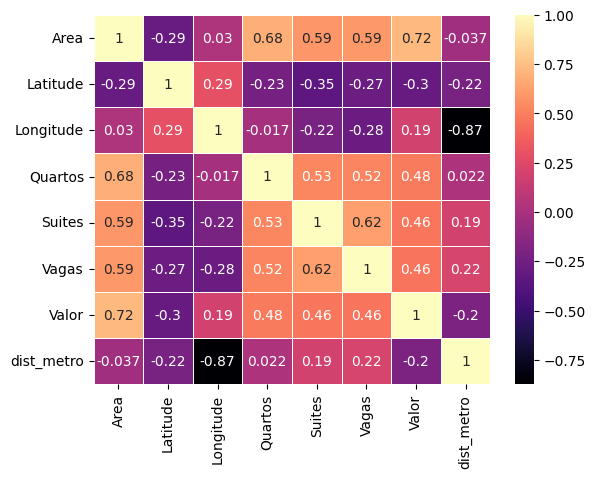

In [48]:
import seaborn as sns

sns.heatmap(df_correlacao, annot=True, cmap="magma", linewidth=0.5)

In [50]:
url_trem = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/trem.geojson'
url_brt = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/brt.geojson'

df_trem = gpd.read_file(url_trem)
df_brt = gpd.read_file(url_brt)
df_trem = df_trem.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")
df_brt = df_brt.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")

In [51]:
df_trem = df_trem[df_trem.within(df_rj.iloc[0].geometry)]
df_brt = df_brt[df_brt.within(df_rj.iloc[0].geometry)]

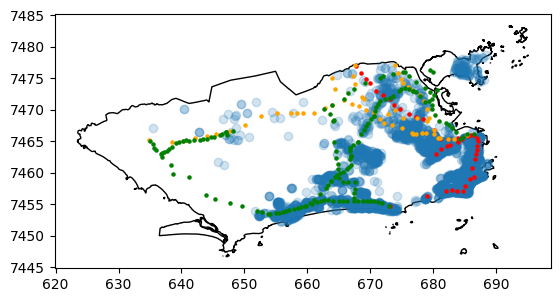

In [53]:
base = df_rj.plot(color='white', edgecolor='black')
df_dados.plot(ax=base, alpha=0.2)
df_metro.plot(ax=base, color='red', markersize=5)
df_trem.plot(ax=base, color='orange', markersize=5)
df_brt.plot(ax=base, color='green', markersize=5)
plt.show()

In [55]:
df_transporte = pd.concat([df_trem.geometry, df_metro.geometry, df_brt.geometry], ignore_index=True)

In [57]:
df_dados['dist_transporte'] = df_dados['geometry'].apply(lambda x: df_transporte.distance(x).min())

In [58]:
df_dados_num = df_dados.select_dtypes(include=[np.number])
df_correlacao = df_dados_num.corr()
df_correlacao

Area  Latitude  Longitude   Quartos    Suites     Vagas  \
Area             1.000000 -0.289299   0.029982  0.681112  0.585817  0.594699   
Latitude        -0.289299  1.000000   0.292822 -0.225226 -0.346480 -0.274707   
Longitude        0.029982  0.292822   1.000000 -0.016882 -0.221548 -0.283960   
Quartos          0.681112 -0.225226  -0.016882  1.000000  0.529611  0.520499   
Suites           0.585817 -0.346480  -0.221548  0.529611  1.000000  0.621140   
Vagas            0.594699 -0.274707  -0.283960  0.520499  0.621140  1.000000   
Valor            0.724397 -0.299038   0.191868  0.481216  0.464075  0.456596   
dist_metro      -0.036662 -0.217749  -0.874681  0.021802  0.188470  0.215717   
dist_transporte -0.042561  0.358777  -0.031816 -0.014523  0.006398  0.070157   

                    Valor  dist_metro  dist_transporte  
Area             0.724397   -0.036662        -0.042561  
Latitude        -0.299038   -0.217749         0.358777  
Longitude        0.191868   -0.874681        -0.031816  
Quartos          0.481216    0.021802        -0.014523  
Suites           0.464075    0.188470         0.006398  
Vagas            0.456596    0.215717         0.070157  
Valor            1.000000   -0.195640        -0.103674  
dist_metro      -0.195640    1.000000         0.261325  
dist_transporte -0.103674    0.261325         1.000000

<Axes: >

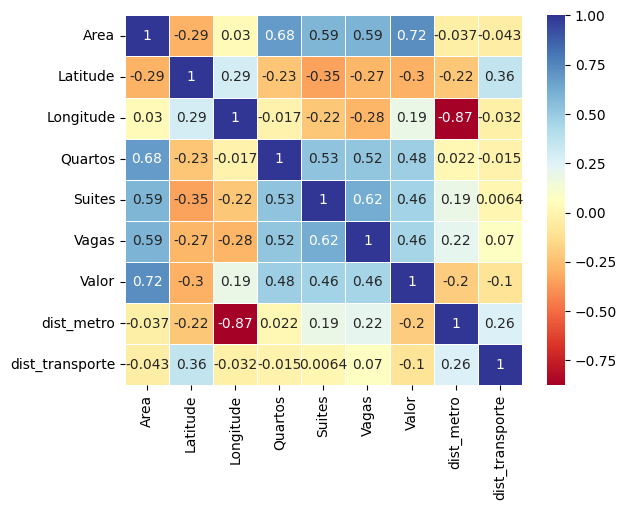

In [59]:
sns.heatmap(df_correlacao, annot=True, cmap='RdYlBu', linewidth=0.5)

In [62]:
url_praia = "https://cdn3.gnarususercontent.com.br/3060-dados-geograficos-geopandas/Cobertura_Vegetal_e_Uso_da_Terra_2018.geojson"
# Caso url falhe, baixar e ler o arquivo local
# url_praia = "cobertura_vegetal_e_uso_da_terra_2018.geojson"
df_praias = gpd.read_file(url_praia)
df_praias.head()

objectid       grupo                      classe formacoes  \
0     49465      Outros  Corpos d’água continentais             
1     49466      Outros  Corpos d’água continentais             
2     49467      Outros  Corpos d’água continentais             
3     49468      Outros  Corpos d’água continentais             
4     49469  Antropismo  Vegetação gramíneo-lenhosa             

  estagio_sucessional sigla                       ano  \
0                       Con 2018-06-01 00:00:00+00:00   
1                       Con 2018-06-01 00:00:00+00:00   
2                       Con 2018-06-01 00:00:00+00:00   
3                       Con 2018-06-01 00:00:00+00:00   
4                        Vg 2018-06-01 00:00:00+00:00   

                      legenda         smac_  st_areashape  st_perimetershape  \
0  Corpos d’água continentais   8684.151722   8684.152076         431.969730   
1  Corpos d’água continentais   2209.349128   2209.347164         241.436675   
2  Corpos d’água continentais  17015.388810  17015.386794         468.729476   
3  Corpos d’água continentais  17597.587072  17597.571083         916.464380   
4  Vegetação gramíneo-lenhosa  11834.907080  11834.901131         605.329904   

                                            geometry  
0  POLYGON ((-43.56631 -23.06286, -43.56616 -23.0...  
1  POLYGON ((-43.59629 -23.04797, -43.59640 -23.0...  
2  POLYGON ((-43.59742 -23.04846, -43.59725 -23.0...  
3  POLYGON ((-43.60753 -23.04328, -43.60773 -23.0...  
4  POLYGON ((-43.57120 -23.05930, -43.57117 -23.0...

In [63]:
df_praias = df_praias.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")

<Axes: >

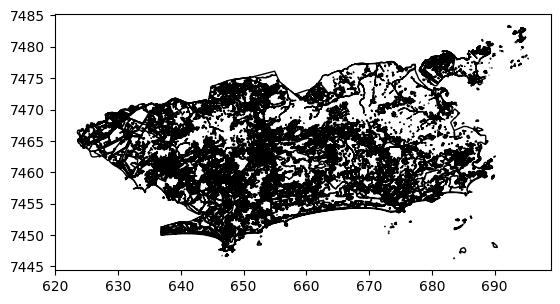

In [64]:
df_praias.plot(color='white', edgecolor='black')

In [65]:
df_praias['classe'].unique()

array(['Corpos d’água continentais', 'Vegetação gramíneo-lenhosa',
       'Formação Pioneira com influência marinha',
       'Vegetação arbórea não florestal', 'Áreas Urbanas', 'Praia',
       'Formação Pioneira com influência flúvio-marinh',
       'Formação Pioneira com influência flúvio-lacust', 'Uso agrícola',
       'Floresta Ombrófila Densa', 'Afloramento Rochoso', 'Solo exposto',
       'Reflorestamento', 'Atividades de Extração Mineral',
       'Corpos d’água costeiros'], dtype=object)

In [66]:
df_praias = df_praias[df_praias.classe=="Praia"]

<Axes: >

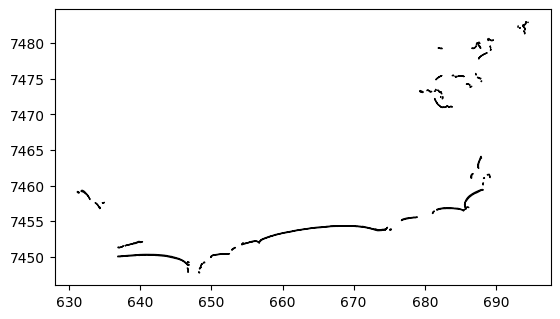

In [67]:
df_praias.plot(color='white', edgecolor='black')

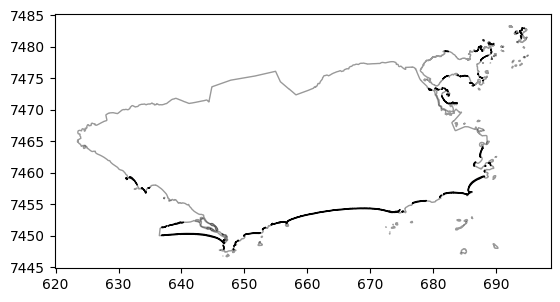

In [71]:
base = df_rj.plot(color='white', edgecolor='black', alpha=0.4)
df_praias.plot(ax=base, color='blue', edgecolor='black')
plt.show()

In [74]:
df_dados['dist_praia'] = df_dados['geometry'].apply(lambda x: df_praias.distance(x).min())

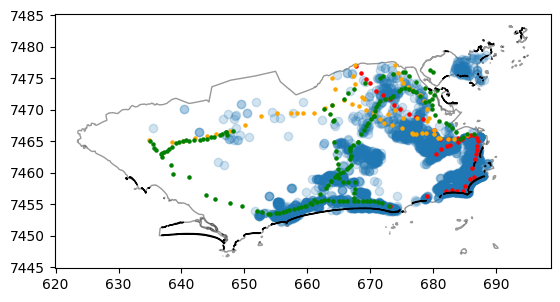

In [73]:
base = df_rj.plot(color='white', edgecolor='black', alpha=0.4)
df_dados.plot(ax=base, alpha=0.2)
df_metro.plot(ax=base, color='red', markersize=5)
df_trem.plot(ax=base, color='orange', markersize=5)
df_brt.plot(ax=base, color='green', markersize=5)
df_praias.plot(ax=base, color='blue', edgecolor='black')
plt.show()

In [75]:
df_dados_num = df_dados.select_dtypes(include=[np.number])
df_correlacao = df_dados_num.corr()
df_correlacao

Area  Latitude  Longitude   Quartos    Suites     Vagas  \
Area             1.000000 -0.289299   0.029982  0.681112  0.585817  0.594699   
Latitude        -0.289299  1.000000   0.292822 -0.225226 -0.346480 -0.274707   
Longitude        0.029982  0.292822   1.000000 -0.016882 -0.221548 -0.283960   
Quartos          0.681112 -0.225226  -0.016882  1.000000  0.529611  0.520499   
Suites           0.585817 -0.346480  -0.221548  0.529611  1.000000  0.621140   
Vagas            0.594699 -0.274707  -0.283960  0.520499  0.621140  1.000000   
Valor            0.724397 -0.299038   0.191868  0.481216  0.464075  0.456596   
dist_metro      -0.036662 -0.217749  -0.874681  0.021802  0.188470  0.215717   
dist_transporte -0.042561  0.358777  -0.031816 -0.014523  0.006398  0.070157   
dist_praia      -0.288809  0.557109  -0.324516 -0.184399 -0.195096 -0.103833   

                    Valor  dist_metro  dist_transporte  dist_praia  
Area             0.724397   -0.036662        -0.042561   -0.288809  
Latitude        -0.299038   -0.217749         0.358777    0.557109  
Longitude        0.191868   -0.874681        -0.031816   -0.324516  
Quartos          0.481216    0.021802        -0.014523   -0.184399  
Suites           0.464075    0.188470         0.006398   -0.195096  
Vagas            0.456596    0.215717         0.070157   -0.103833  
Valor            1.000000   -0.195640        -0.103674   -0.359030  
dist_metro      -0.195640    1.000000         0.261325    0.197632  
dist_transporte -0.103674    0.261325         1.000000    0.229188  
dist_praia      -0.359030    0.197632         0.229188    1.000000

<Axes: >

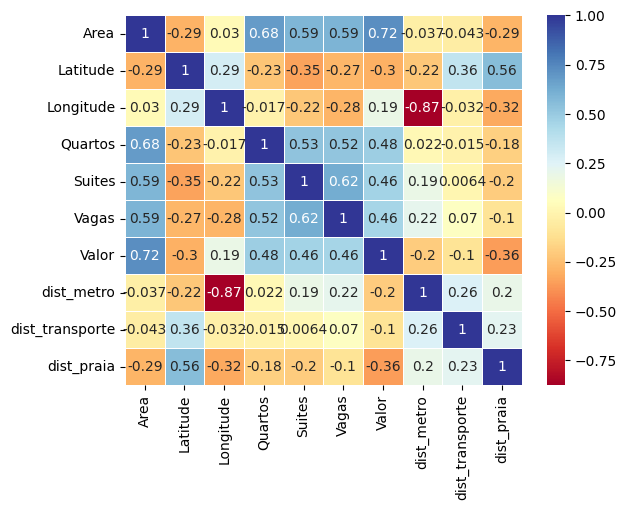

In [76]:
sns.heatmap(df_correlacao, annot=True, cmap='RdYlBu', linewidth=0.5)

<Axes: xlabel='dist_praia', ylabel='Valor'>

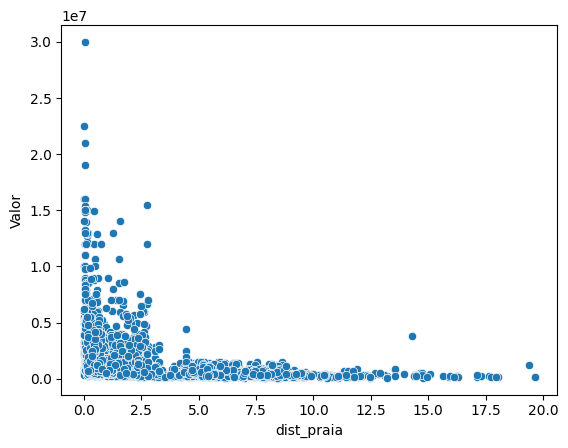

In [78]:
sns.scatterplot(x="dist_praia", y="Valor", data=df_dados)